Your goal in this task is to implement a multi-class Logistic Regression Classifier. 

In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
import dmStyle
dmStyle.customize_mpl()


Setting custom matplotlib visual style


In [3]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

###Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{1, 2, 3,\dots, k\})$.
Your goal in this assignment is to implement multi-class Logistic Regression classifier. We will be using $1-in-k$ class representation and will be training $k$ classifiers for $k$ different classes. During training we will be representing each example's class label with a binary vector of $k$ dimensions with $j_{th}$ dimension which example will be set to 1. For instance, if an example has a label$=4$ and total number of classes are 6 then it's label during training will be represented by the vector =$[0,0,0,1,0,0]$


Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$.  Now we will be having $k$ such hypothesis, and during testing the label of the hypothesis that gives highest score to a test example will be used as label of the test example.

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack$$

For a multi-class classifier it can be updated as:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} \lbrack -y_j^{(i)} \log(h_{\theta^{(j)}}(x^{(i)})) - (1-y_j^{(i)}) \log(1-h_{\theta^{(j)}}(x^{(i)})) \rbrack$$


Here
$$h_{\theta^{(j)}}(x^{(i)})= \frac{1}{1+\exp(-x^{(i)^T}\theta^{(j)}} $$

For instance, for a two class classifier this cost function will be:


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} \lbrack -y_1^{(i)} \log(h_{\theta^{(1)}}(x^{(i)})) - (1-y_1^{(i)}) \log(1-h_{\theta^{(1)}}(x^{(i)}))-y_2^{(i)} \log(h_{\theta^{(2)}}(x^{(i)})) - (1-y_2^{(i)}) \log(1-h_{\theta^{(2)}}(x^{(i)}))\rbrack$$


Here
$$h_{\theta^{(1)}}(x^{(i)})= \frac{1}{1+\exp(-x^{(i)^T}\theta^{(1)})} $$


The gradient of the above cost function is a vector of the same length as $\theta$ where the $p^{th}$ element (for $p = 0,1,...,q$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_p} = \frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta^{(j)}}(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$

For optimal performance you might be needed to add a regularization term to the cost function. In that case your cost function will be updated to 

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} \lbrack -y_j^{(i)} \log(h_{\theta^{(j)}}(x^{(i)})) - (1-y_j^{(i)}) \log(1-h_{\theta^{(j)}}(x^{(i)})) \rbrack+ \lambda \frac{1}{2}\sum_{i=1}^q \theta_k^2$$

However, note that for this assignment your task is to implement simple multi-class logistic regression without regularization. Afterwards, you can extend it very easily.


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




In [4]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxiter, alpha, plotcf=True,nclasses=1):
    eps=0.00001
    #print X.shape
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1]*nclasses,1)
    

    converged = False
    numiter =0
    CF = cost_function(X,Y,thetas)
    numit=[]
    costValue=[]
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad =derivative_cost_function(X,Y,thetas)

        for k in range(len(thetas)):
            thetas[k]=thetas[k] - alpha * grad[k]

        # Cost function with new thetas
        e = cost_function(X,Y,thetas) 
        
        if abs(CF-e) <= eps:
            print 'Converged, iterations: ', numiter, '!!!'
            converged = True
        
        CF = e   # update error 
        numiter += 1  # update iter
        numit.append(numiter)
        costValue.append(e)
        if numiter == maxiter:
            print 'Max interactions exceeded!'
            converged = True
    plt.plot(numit,costValue)
    print 'Value of Cost Function (obtained in {} iterations) at Minimum Points {}, is {}'.format(numiter,thetas,CF)
    return thetas

In [5]:
import pdb
def one_of_k(ilabels):

    classes=np.unique(ilabels)
    
    nclasses=len(classes)
    
    olabels=np.zeros((ilabels.shape[0],nclasses))
    
    for i, l in enumerate(ilabels):        
        olabels[i,classes==l]=1
        
    return olabels

class LogisticRegressionMC:

    def __init__(self,featdim,classes,alpha=0.001,maxniter=20000,scalefeatures=False):        
        self.theta=[] # learned set of parameters 
        self.scalefeatures=scalefeatures
        self.classes=np.unique(classes) # set of classes
        self.nclasses=len(self.classes) # number of classes
        self.featdim=featdim # dimensions of features
        self.alpha=alpha # learning parameter
        self.maxniter=maxniter 
        
   
    def hypothesis(self, X):

        h=float(1)/(1.0+np.exp(-X))
        return h
    
    def cost_function(self, X,Y, theta):

        m=X.shape[0]
        theta=theta.reshape(self.nclasses,X.shape[1]).T
        cost = (1.0/m) * np.sum((-Y * (np.log(self.hypothesis(X.dot(theta)))) - (1-Y)*(np.log(1-self.hypothesis(X.dot(theta))))))
        import pdb 
        pdb.set_trace()
        return cost

    def derivative_cost_function(self,X,Y,theta):

        m=float(X.shape[0])
        theta=theta.reshape(self.nclasses,X.shape[1]).T
        partialDerivatives=(1.0/m)*transpose(self.hypothesis(X.dot(theta))-Y).dot(X)
        partialDerivatives=partialDerivatives.reshape(self.nclasses*X.shape[1],1)
        return partialDerivatives

    def train(self, X, Y):
        
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        nY=one_of_k(Y) # get a n x k
        if self.scalefeatures:
            X=self.scale_features(X)
        maxiter=10000
        alpha=self.alpha
        self.theta=GradientDescent(X,nY,self.cost_function,self.derivative_cost_function,maxiter,alpha,nclasses=3)
        
        
    
    def predict(self, X):
        
        """
        Test the trained logistic regression classifier result on the given examples X
        
                   
            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
           
            Returns:
            -----------
            pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        num_test = X.shape[0]
        
        if len(self.theta)-X.shape[1] == 1:
            # append 1 at the end of each example for the bias term
            X=np.hstack((np.ones((X.shape[0],1)),X))
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
        
        
        
        Ypred=[]

        num_test = X.shape[0]
        pclasses=[]
        theta=self.theta.reshape(self.nclasses,self.featdim).T
        hyp=self.hypothesis(X.dot(theta))
        pos=np.argmax(hyp,axis=-1)
        Ypred=self.classes[pos]
        
        return np.array(Ypred).reshape((num_test,1))
    
    
    def scale_features(self,X):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                X= M x d dimensional data matrix

            Returns:
            --------

                normalized X
        """
        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)


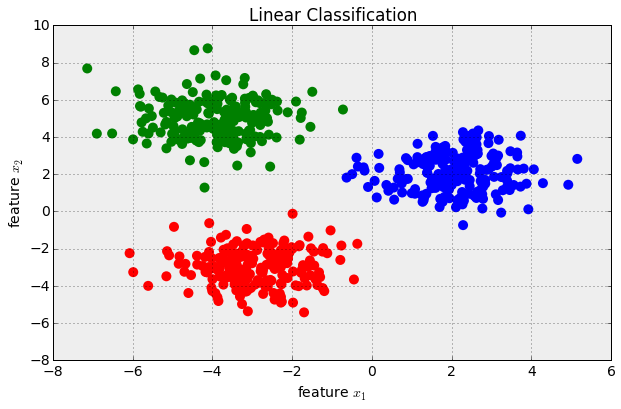

In [6]:
# Create some dummy data for training and testing

np.random.seed(seed=99)

# make some data up using Gaussian distribution...
mean1 = [-3,-3]
mean2 = [2,2]
mean3 = [-4,5]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=600
x1 = np.random.multivariate_normal(mean1,cov,nexamples/3)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/3)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/3)

X=np.vstack((x1,x2,x3))
Y=np.vstack((1*np.ones((nexamples/3,1)),2*np.ones((nexamples/3,1)),3*np.ones((nexamples/3,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='g', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class-lr.svg',format='svg')

In [7]:
print X.shape,Y.shape

(600L, 2L) (600L, 1L)


In [8]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((np.ones((X.shape[0],1)),X))

In [9]:
print X.shape,Y.shape

(600L, 3L) (600L, 1L)


In [10]:
ook=one_of_k(Y)

In [11]:
ook

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [12]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function,nclasses=1):
    """
        Function test the implementation of the derivative function...
        X: Input test examples (m x d)
        Y: True labels (m x 1)
        cost_function: function used to compute cost function...
        derivative_cost_function: function used to compute derivative of the cost function...
    """
    
    thetas=np.random.rand(X.shape[1]*nclasses,1)
    
    ad=derivative_cost_function(X,Y,thetas)
    print ad
    eps=0.0001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [13]:
#%pdb
lrclass=LogisticRegressionMC(3,np.unique(Y),alpha=0.01)

In [14]:
# %pdb
test_derivative(X,ook,lrclass.cost_function,lrclass.derivative_cost_function,3)

[[ 0.04605783]
 [ 1.42959578]
 [ 1.71950273]
 [ 0.03417814]
 [-0.26617174]
 [ 0.04592741]
 [ 0.30850306]
 [ 0.75997326]
 [ 0.55152608]]
diff in direction [[ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
> <ipython-input-5-4ae18f81bac7>(84)cost_function()
-> return cost
(Pdb) l
 79  	        m=X.shape[0]
 80  	        theta=theta.reshape(self.nclasses,X.shape[1]).T
 81  	        cost = (1.0/m) * np.sum((-Y * (np.log(self.hypothesis(X.dot(theta)))) - (1-Y)*(np.log(1-self.hypothesis(X.dot(theta))))))
 82  	        import pdb 
 83  	        pdb.set_trace()
 84  ->	        return cost
 85  	
 86  	    def derivative_cost_function(self,X,Y,theta):
 87  	        '''
 88  	            Computes the derivates of Cost function w.r.t input parameters (thetas)  
 89  	            for given input and labels.
(Pdb) print cost
3.29399083003
(Pdb) theta.shape
(3L, 3L)
(Pdb) self.hypothesis(X.dot(theta))
array([[ 0.08796187,  0.08623505,  0.10354305],
 

KeyboardInterrupt: 

Converged, iterations:  4821 !!!
Value of Cost Function (obtained in 4822 iterations) at Minimum Points [[-0.39130184]
 [-0.69825179]
 [-2.03431495]
 [ 0.4431703 ]
 [ 2.33276741]
 [ 0.33840859]
 [-3.47969813]
 [-0.82746224]
 [ 0.93264866]], is 0.071166597673


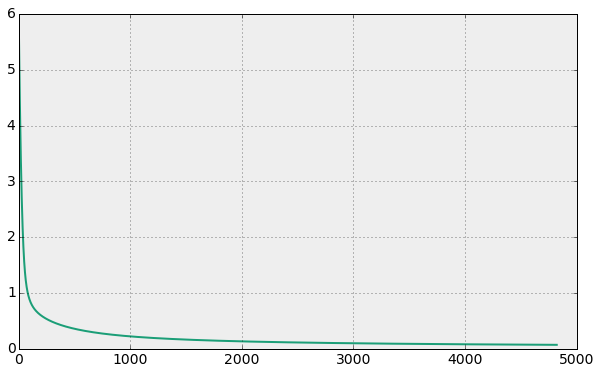

In [237]:
#%pdb off
lrclass.train(X,Y) # c

### Let Plots the decision boundaries of the classes, using simple scatter plots... 

Automatic pdb calling has been turned OFF
[ 1.         -3.14235884 -0.94277826] (600L, 3L)
(10000L, 2L)
[[ 3.]
 [ 2.]
 [ 3.]
 ..., 
 [ 1.]
 [ 3.]
 [ 1.]]
[ 1.  2.  3.]


(-5.4268033365281951, 8.7674908998331276)

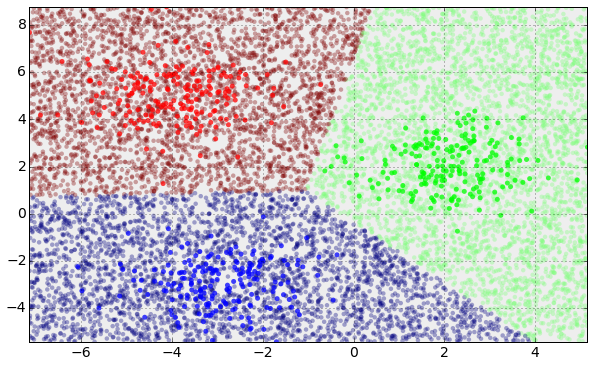

In [244]:
%pdb off
npts=10000
model=lrclass
print X[0],X.shape
ax=plt.gca()
x0spr = max(X[:,1])-min(X[:,1])
x1spr = max(X[:,2])-min(X[:,2])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,1])
tx[:,1] = tx[:,1]*x1spr + min(X[:,2])

print tx.shape
#pdb.set_trace()
tx=np.hstack((np.ones((tx.shape[0],1)),tx))
cs= model.predict(tx);
print cs
print  np.unique(cs)
ax.scatter(tx[:,1],tx[:,2],c=cs.ravel(), alpha=.35)

ax.hold(True)
ax.scatter(X[:,1],X[:,2],
              c=list(map(lambda x:'blue' if x==1 else 'lime' if x==2 else 'r',Y)), 
              linewidth=0,s=25,alpha=0.75)
ax.set_xlim([min(X[:,1]), max(X[:,1])])
ax.set_ylim([min(X[:,2]), max(X[:,2])])

#Load Iris dataset and test the classifier on them...

In [15]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [16]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [17]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [19]:
feat=[1,2,3,4]
Y=Y.reshape((len(Y),1))

In [ ]:
#%pdb
lrclass=LogisticRegressionMC(len(feat),np.unique(Y),alpha=0.01)
lrclass.train(X[:,feat],Y)

> <ipython-input-5-4ae18f81bac7>(84)cost_function()
-> return cost
(Pdb) cost
9.8637417462463119
(Pdb) self.hypothesis(X.dot(theta))
array([[ 0.93627109,  0.93307334,  0.90427405],
       [ 0.93492804,  0.93150823,  0.9034692 ],
       [ 0.94244009,  0.93926614,  0.91220672],
       [ 0.94580478,  0.94228109,  0.91815913],
       [ 0.9667451 ,  0.95911519,  0.93754366],
       [ 0.94758019,  0.94079995,  0.91396356],
       [ 0.94693608,  0.94361493,  0.91885251],
       [ 0.93453728,  0.9314118 ,  0.9017644 ],
       [ 0.93720757,  0.93778341,  0.91198682],
       [ 0.95109911,  0.94766967,  0.92503656],
       [ 0.95080035,  0.94759471,  0.92368047],
       [ 0.93051912,  0.93145046,  0.90403637],
       [ 0.91338159,  0.91505414,  0.88525462],
       [ 0.94347365,  0.93952412,  0.91675617],
       [ 0.96623059,  0.9581923 ,  0.93813433],
       [ 0.95482569,  0.94509233,  0.9200094 ],
       [ 0.94898741,  0.94224817,  0.91619053],
       [ 0.96261777,  0.95702648,  0.93567948],
   

In [251]:
print np.unique(Y)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [252]:
def print_confusion_matrix(plabels,tlabels):
    """
        functions print the confusion matrix for the different classes
        to find the error...
        
        Input:
        -----------
        plabels: predicted labels for the classes...
        tlabels: true labels for the classes
        
        code from: http://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
    """
    import pandas as pd
    plabels = pd.Series(plabels)
    tlabels = pd.Series(tlabels)
    
    # draw a cross tabulation...
    df_confusion = pd.crosstab(tlabels,plabels, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    #print df_confusion
    return df_confusion

In [253]:
print_confusion_matrix((lrclass.predict(X[:,feat])).ravel(),Y.ravel())

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,49,0,0,49
Iris-versicolor,0,36,14,50
Iris-virginica,0,4,46,50
All,49,40,60,149


(10000L, 2L)
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


(0.10000000000000001, 2.5)

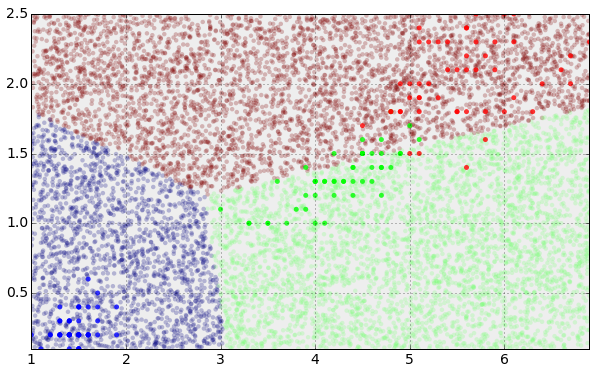

In [255]:
npts=10000
model=lrclass
ax=plt.gca()
x0spr = max(X[:,feat[0]])-min(X[:,feat[0]])
x1spr = max(X[:,feat[1]])-min(X[:,feat[1]])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,feat[0]])
tx[:,1] = tx[:,1]*x1spr + min(X[:,feat[1]])

print tx.shape
#pdb.set_trace()
tx=np.hstack((tx,np.ones((tx.shape[0],1))))
cs= model.predict(tx);
# print cs
print  np.unique(cs)
mc=list(map(lambda x:1 if x=='Iris-setosa' else 2 if x=='Iris-versicolor' else 3,cs))
ax.scatter(tx[:,0],tx[:,1],c=mc, alpha=.25)

ax.hold(True)
ax.scatter(X[:,feat[0]],X[:,feat[1]],
               c=list(map(lambda x:'blue' if x=='Iris-setosa' else 'lime' if x=='Iris-versicolor' else 'r',Y)), 
               linewidth=0,s=25,alpha=0.8)
ax.set_xlim([min(X[:,feat[0]]), max(X[:,feat[0]])])
ax.set_ylim([min(X[:,feat[1]]), max(X[:,feat[1]])])